<a href="https://colab.research.google.com/github/ahmadshajhan/Ahmad/blob/main/01_neural_network_regression_in_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

See full course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating data to view and fit

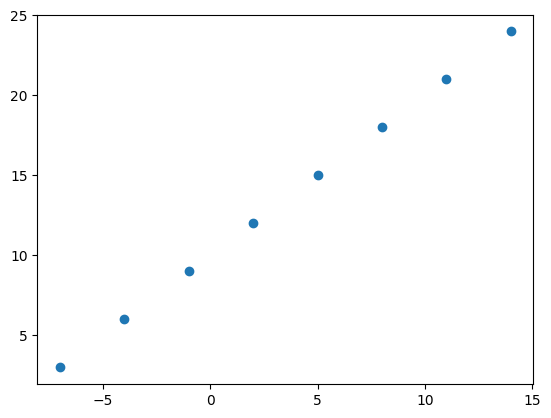

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

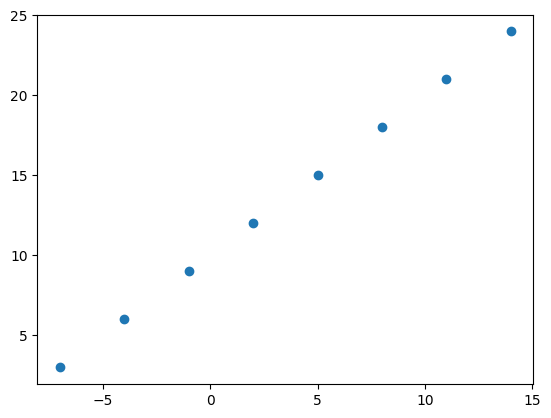

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# Reshape X to be 2-dimensional for the Dense layer
X_reshaped = tf.expand_dims(X, axis=-1)

# 3. Fit the model
model.fit(X_reshaped, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.1639 - mae: 9.1639   
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 9.0314 - mae: 9.0314
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 8.8989 - mae: 8.8989
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - loss: 8.7664 - mae: 8.7664
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.6339 - mae: 8.6339


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]], dtype=tf.float32))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[24.086208]], dtype=float32)

In [16]:
y_pred + 11

array([[35.08621]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Reshape X to be 2-dimensional for the Dense layer
X_reshaped = tf.expand_dims(X, axis=-1)

# 3. Fit the model (this time we'll train for longer)
model.fit(X_reshaped, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 19.2859 - mae: 19.2859
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 19.0046 - mae: 19.0046
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 18.7234 - mae: 18.7234
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 18.4421 - mae: 18.4421
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 18.1609 - mae: 18.1609
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 17.8796 - mae: 17.8796
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 17.5984 - mae: 17.5984
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 17.3171 - mae: 17.3171
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 17.0359 - mae: 17.0359
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 16.7546 - mae: 16.7546
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 16.4734 - mae: 16.4734
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 16.1921 - mae: 16.1921
Epoch 13/100
1/1 ━━━━

In [18]:



# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved...
print(model.predict(tf.constant([[17.0]], dtype=tf.float32)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[29.716171]]


In [20]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Reshape X to be 2-dimensional for the Dense layer
X_reshaped = tf.expand_dims(X, axis=-1)

# 3. Fit the model
model.fit(X_reshaped, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.0054 - mae: 12.0054
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 11.2981 - mae: 11.2981
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 10.5856 - mae: 10.5856
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 9.8654 - mae: 9.8654
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 9.1340 - mae: 9.1340
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 8.3880 - mae: 8.3880
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 7.6239 - mae: 7.6239
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 6.9601 - mae: 6.9601
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 6.9769 - mae: 6.9769
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 7.2431 - mae: 7.2431
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 7.3830 - mae: 7.3830
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 7.4192 - mae: 7.4192
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [21]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's try to make a prediction
# Convert the input to a TensorFlow tensor and reshape it to (1, 1)
y_pred = model.predict(tf.constant([[17.0]], dtype=tf.float32))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


array([[28.077658]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

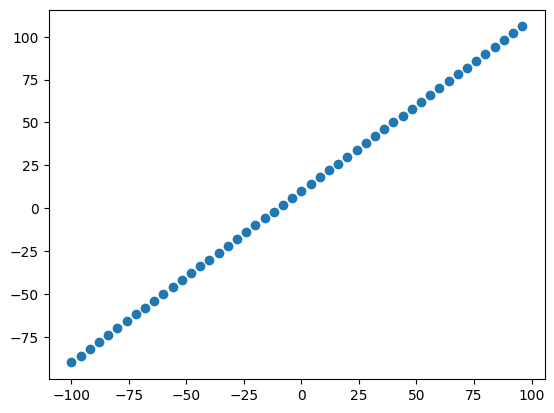

In [25]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.



In [26]:
len(X)

50

In [27]:
#Split the  data into train and test set
X_train = X[:40] # first 40 traning samples
y_train = y[:40] # last 10 samples (20% of the data)

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing our data

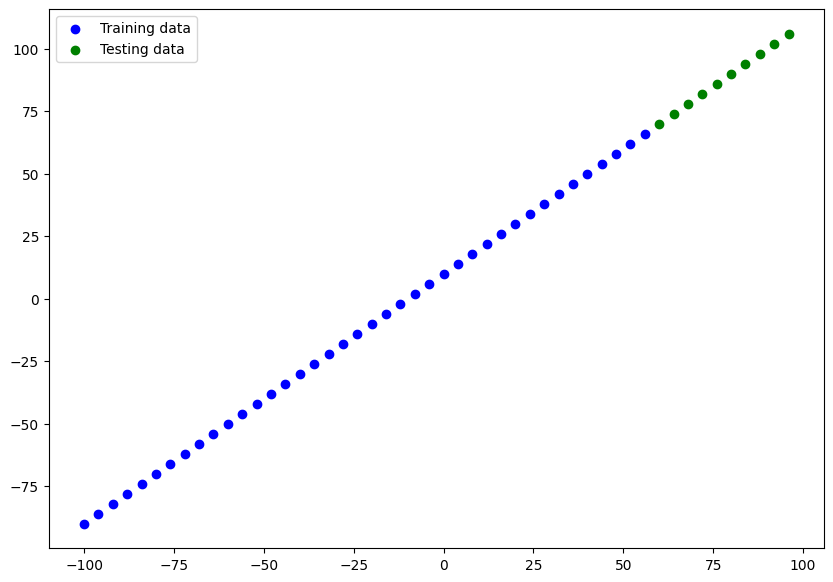

In [28]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#Plort the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [29]:
#Build a neural network

#1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#2. Fit the model
# model.fit(X_train, y_train, epochs=100)

###Visualizing the model

In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="my_model")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
#let fit our model to traning data
model.fit(X_train, y_train, epochs=500, verbose=0)

In [34]:
#Get asummary of our model
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

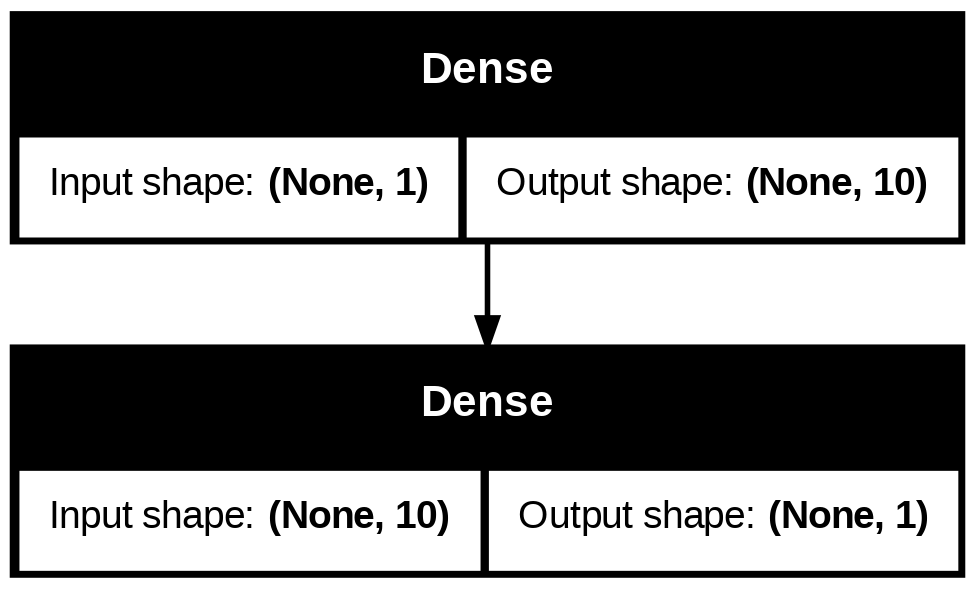

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

#### Visualizing our model prdection

In [36]:
#Make some predections
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[ 65.452484],
       [ 69.32388 ],
       [ 73.1953  ],
       [ 77.066696],
       [ 80.93811 ],
       [ 84.809525],
       [ 88.68093 ],
       [ 92.55234 ],
       [ 96.42375 ],
       [100.29516 ]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [38]:
#Let create a ploating function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predections=y_pred):
  """Plot traning data and testing data and predections."""
  plt.figure(figsize=(10, 7))
  #plot traning data in blue
  plt.scatter(train_data, train_labels, c="b", label="traning data")
  plt.plot(test_data, test_labels, c="g", label="test data")
  #plot predections in red
  plt.scatter(test_data, predections, c="r", label="predections")
  #Show thw lagend
  plt.legend()


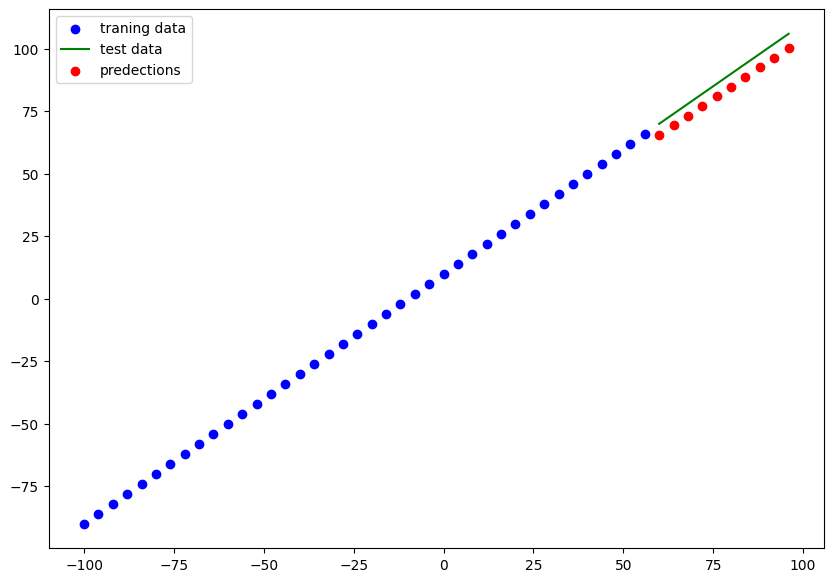

In [39]:
plot_predictions()

#Evaluating our model predictions with regression evaluation matrix

In [40]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 5.1262 - mae: 5.1262


[5.126182556152344, 5.126182556152344]

In [41]:
y_pred

array([[ 65.452484],
       [ 69.32388 ],
       [ 73.1953  ],
       [ 77.066696],
       [ 80.93811 ],
       [ 84.809525],
       [ 88.68093 ],
       [ 92.55234 ],
       [ 96.42375 ],
       [100.29516 ]], dtype=float32)

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
# Ensure y_pred is a TensorFlow tensor
y_pred_tensor = tf.constant(y_pred, dtype=tf.float32)

# Cast y_test to float32 to match y_pred's dtype
y_test_float = tf.cast(y_test, dtype=tf.float32)

# Instantiate the MeanAbsoluteError loss function and calculate MAE
mae_loss_object = tf.keras.losses.MeanAbsoluteError()
mae = mae_loss_object(y_true=y_test_float, y_pred=y_pred_tensor)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.126182556152344>

In [44]:
# Calculate the mean square error
mae_loss_object = tf.keras.losses.MeanSquaredError()
mae = mae_loss_object(y_true=y_test_float, y_pred=y_pred_tensor)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=26.414165496826172>

In [45]:
import tensorflow as tf

def mae(y_true, y_pred):
    """Calculate Mean Absolute Error."""
    return tf.reduce_mean(tf.abs(y_true - y_pred))

def mse(y_true, y_pred):
    """Calculate Mean Squared Error."""
    return tf.reduce_mean(tf.square(y_true - y_pred))


In [46]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [47]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [48]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Reshape X_train to be 2-dimensional for the Dense layer
X_train_reshaped = tf.expand_dims(X_train, axis=-1)

model_1.fit(X_train_reshaped, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 77.1785 - mae: 77.1785 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 42.1125 - mae: 42.1125
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.0796 - mae: 11.0796
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.8694 - mae: 7.8694
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.8690 - mae: 10.8690
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.6664 - mae: 7.6664
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.0438 - mae: 12.0438
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.1981 - mae: 8.1981
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.8558 - mae: 8.8558
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.7971 - mae: 7.7971
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.7764 - mae: 10.7764
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.5999 - mae: 7.5999
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


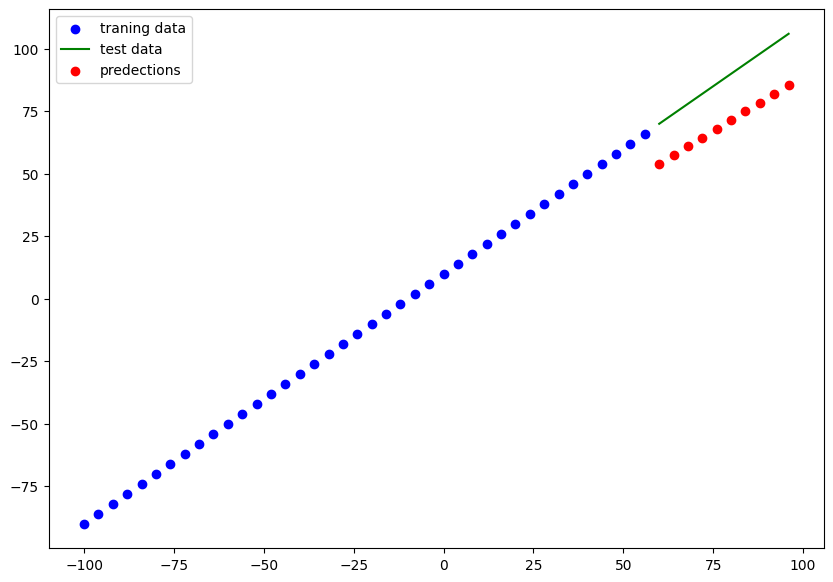

In [49]:
# Make and polt predicytion model1sss
y_pred_model_1 = model_1.predict(X_test)
plot_predictions(predections=y_pred_model_1)

In [50]:
#Calculate the modle 1 evaluation metrics
mae_1 = mae(y_test, y_pred_model_1)
mse_1 = mse(y_test, y_pred_model_1)
mae_1, mse_1


(<tf.Tensor: shape=(), dtype=int32, numpy=20>,
 <tf.Tensor: shape=(), dtype=int32, numpy=591>)

In [51]:
#Set the random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])
#fit the model
model_2.fit(X_train_reshaped, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 44.3128 - mae: 44.3128
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 43.6788 - mae: 43.6788
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 43.0463 - mae: 43.0463
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 42.4147 - mae: 42.4147
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 41.7838 - mae: 41.7838 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 41.1537 - mae: 41.1537
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 40.5242 - mae: 40.5242 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 39.8955 - mae: 39.8955
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 39.2676 - mae: 39.2676 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 38.6403 - mae: 38.6403 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 38.0138 - mae: 38.0138 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 37.3880 - mae: 37.3880 
Epoch 13/500
2/2 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


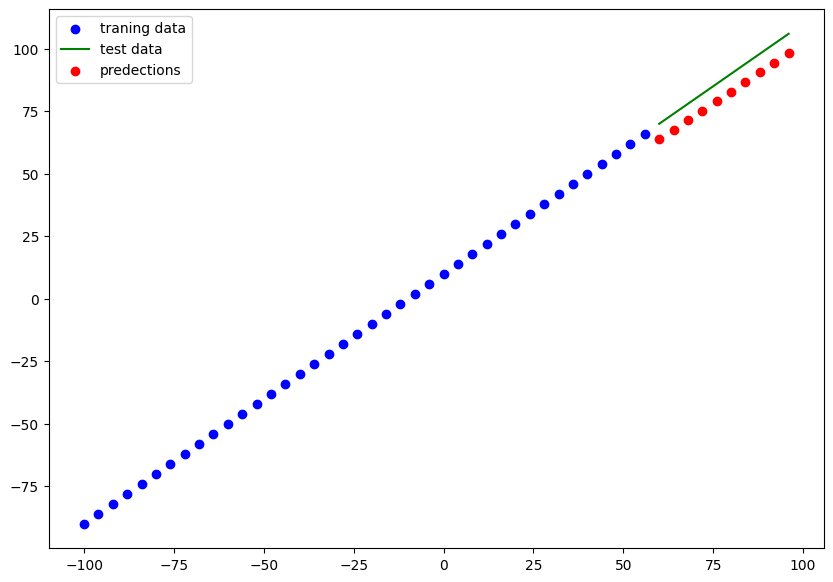

In [52]:
#Make and polt predictions
y_pred_model_2 = model_2.predict(X_test)
plot_predictions(predections=y_pred_model_2)


In [53]:
#Calculate the model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_model_2)
mse_2 = mse(y_test, y_pred_model_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=int32, numpy=14>,
 <tf.Tensor: shape=(), dtype=int32, numpy=310>)

###model_3

In [54]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_3.fit(X_train_reshaped, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 40.5660 - mae: 40.5660
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 39.9040 - mae: 39.9040
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 39.2422 - mae: 39.2422
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 38.5797 - mae: 38.5797
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 37.9165 - mae: 37.9165
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 37.2524 - mae: 37.2524 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 36.5875 - mae: 36.5875
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 35.9216 - mae: 35.9216
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 35.2547 - mae: 35.2547
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 34.5868 - mae: 34.5868
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 33.9244 - mae: 33.9244
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 33.2656 - mae: 33.2656
Epoch 13/500
2/2 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


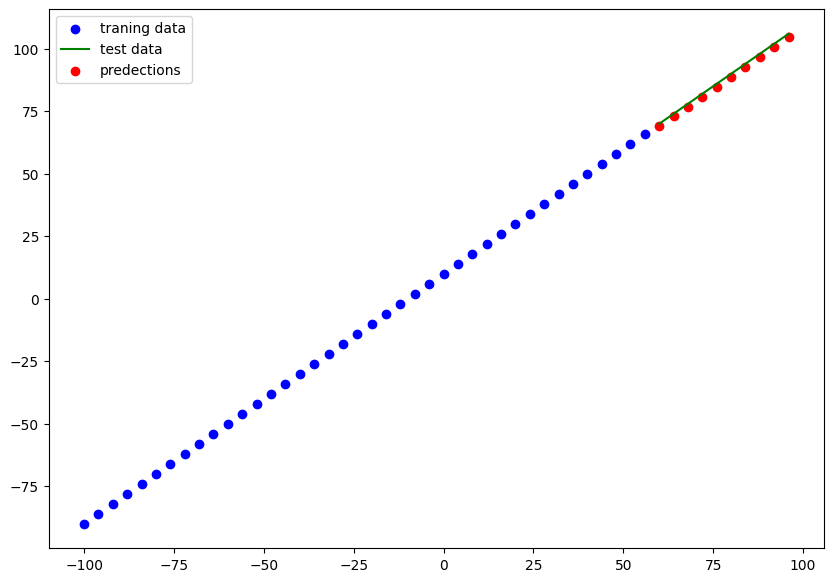

In [55]:
#Make predictions
y_pred_model_3 = model_3.predict(X_test)
plot_predictions(predections=y_pred_model_3)

In [56]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_model_3)
mse_3 = mse(y_test, y_pred_model_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=int32, numpy=13>,
 <tf.Tensor: shape=(), dtype=int32, numpy=268>)

## Comaparing our experiments

In [57]:
# Let's compare our mode';s results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_model_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_model_results

,model,mae,mse
0,model_1,20,591
1,model_2,14,310
2,model_3,13,268


In [58]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=all_model_results)

https://docs.google.com/spreadsheets/d/1qC2TdLCNrkTqEUj5lXi6Rakpf-NfuV60YCOz3We0Cyc/edit#gid=0


In [59]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

#Save a model

#Save check points for summary  

* `The saved model format`
* `The HDF5 Format`

In [60]:
model_2.save("Best_model_Savemodel_format.keras")

In [61]:
#Save the model using the HDF5 format
model_2.save("Best_model_HDF5_format.h5")

#Load the saved model

In [62]:
loaded_saved_model_format  = tf.keras.models.load_model("Best_model_Savemodel_format.keras")

In [63]:
loaded_saved_model_format.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [64]:
loaded_hdf5_model_format = tf.keras.models.load_model("Best_model_HDF5_format.h5")

In [65]:
loaded_hdf5_model_format.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [66]:
model_2_pred = model_2.predict(X_test)
loaded_saved_model_format_pred = loaded_saved_model_format.predict(X_test)
loaded_hdf5_model_format_pred = loaded_hdf5_model_format.predict(X_test)

# To compare arrays, use tf.math.reduce_all or np.all to get a single boolean result
print(tf.math.reduce_all(model_2_pred == loaded_saved_model_format_pred))
print(tf.math.reduce_all(model_2_pred == loaded_hdf5_model_format_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)


#Download the model outside the Google colab

In [67]:
from google.colab import files
files.download("Best_model_Savemodel_format.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>